In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# funkcja sinus w sensie rozwinięcia Mclaurina

# x - zmienna 
# n - dokladnosc
# k - czestosc

def Sin(x, k, n=30):
    suma = 0
    for i in range(n):
        suma += ((-1)**i * (k * x)**(2 * i + 1)) / np.math.factorial(2 * i + 1)
    return suma

In [8]:
# Funkcja podcałkowa

# x - zmienna 
# k - czestosc
# m - wykladnik dla funkcji x
#ѱ
def Psi(x, k, m):    
    return np.power(x, m) * np.sin(k * x)

In [9]:
# zwraca numeryczną wartość całki z funkcji ѱ(x)

# h - szerokość słupka
# N - liczba węzłów (nieparzysta)
# a,b - granice całkowania 

def Simpson(k, m, N, a = 0, b = np.pi):
    suma = 0
    h = (b - a) / (N - 1)
#     x_vec = np.linspace(a, b, N)
    
    for i in range(1, int((N - 1) / 2) + 1):
        suma += Psi((2*i - 2) * h, k, m) + 4*Psi((2*i - 1) * h, k, m) + Psi((2*i) * h, k, m)
    
    return h / 3 * suma 

In [11]:
# Wartości dokładne
dokladne_wartosci = {
    (0, 1): 2,
    (1, 1): np.pi,
    (5, 5): 56.363569
}
n_tab = [11, 21, 51, 101, 201]

## Zadanie 2

In [13]:
# Przechowywanie wyników
wyniki_simpson = {key: [] for key in dokladne_wartosci.keys()}
wyniki_taylor = {key: [] for key in dokladne_wartosci.keys()}

# Obliczenia
for (m, k) in dokladne_wartosci.keys():
    for N in n_tab:
        wyniki_simpson[(m, k)].append(Simpson(k, m, N))
    
    # Metoda rozwinięcia w szereg Taylora
    taylor_sum = 0
    taylor_results = []
    for i in range(1, 31):
        taylor_sum += ((-1)**(i-1) * (k * np.pi)**(2*i + m + 2)) / (k * (m + 1) * np.math.factorial(2 * i - 1) * (2 * i + m + 2))
        taylor_results.append(taylor_sum)
    wyniki_taylor[(m, k)] = taylor_results

# Wyniki dla różnych n_tab
for (m, k) in dokladne_wartosci.keys():
    print(f'Wyniki dla m={m}, k={k}:')
    for idx, N in enumerate(n_tab):
        print(f'n = {N}: Simpson = {wyniki_simpson[(m, k)][idx]:.6f}')
    print()

Wyniki dla m=0, k=1:
n = 11: Simpson = 2.000110
n = 21: Simpson = 2.000007
n = 51: Simpson = 2.000000
n = 101: Simpson = 2.000000
n = 201: Simpson = 2.000000

Wyniki dla m=1, k=1:
n = 11: Simpson = 3.141765
n = 21: Simpson = 3.141603
n = 51: Simpson = 3.141593
n = 101: Simpson = 3.141593
n = 201: Simpson = 3.141593

Wyniki dla m=5, k=5:
n = 11: Simpson = 57.843583
n = 21: Simpson = 56.462920
n = 51: Simpson = 56.366084
n = 101: Simpson = 56.363727
n = 201: Simpson = 56.363580



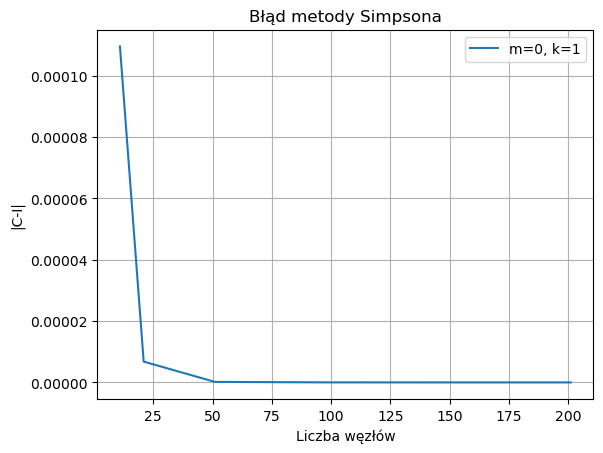

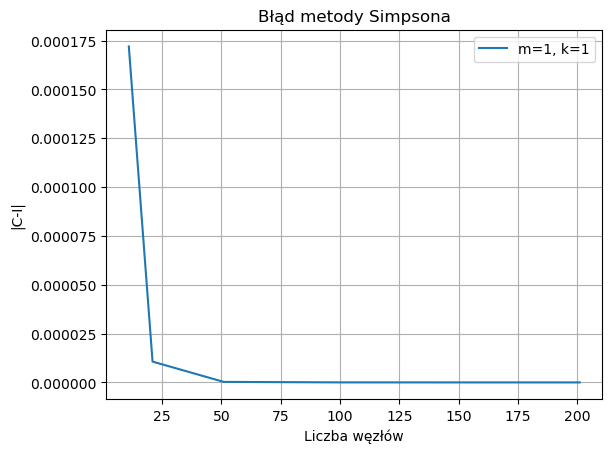

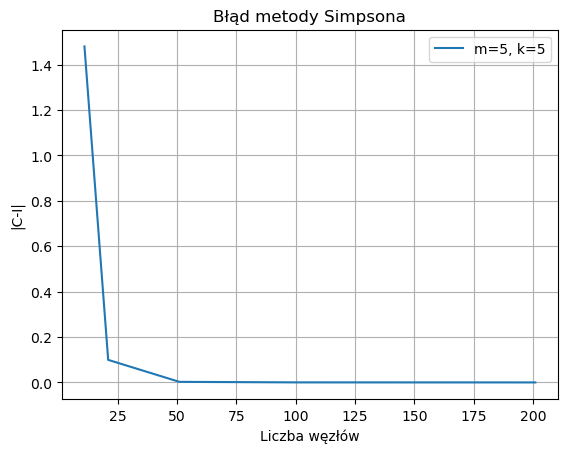

In [15]:
# Wykresy zależności |C-I| od ilości węzłów
for (m, k) in dokladne_wartosci.keys():
    dokladna = dokladne_wartosci[(m, k)]
    blad_simpson = [abs(C - dokladna) for C in wyniki_simpson[(m, k)]]
    plt.plot(n_tab, blad_simpson, label=f'm={m}, k={k}')
    plt.xlabel('Liczba węzłów')
    plt.ylabel('|C-I|')
    plt.title('Błąd metody Simpsona')
    plt.legend()
    plt.grid(True)
    plt.show()